In [1]:
import requests
import pandas as pd

In [2]:
df = requests.get('https://api.covid19india.org/data.json').json()

In [3]:
rows = df['cases_time_series']

In [4]:
df = pd.DataFrame()

In [5]:
for r in rows:
    df = df.append(r,ignore_index=True)

In [6]:
df = df.set_index('date')

In [7]:
df.index = [i + '2020' for i in df.index]

In [8]:
df.index = df.index.str.strip()

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
df = df.astype(int)

In [11]:
df.iloc[:,3:].plot(logy=True)

In [12]:
df['dailyactive']= df['dailyconfirmed'] - df['dailyrecovered'] - df['dailydeceased']

In [13]:
df['totalactive'] = df['totalconfirmed'] - df['totalrecovered'] - df['totaldeceased']

In [14]:
import matplotlib.pyplot as plt

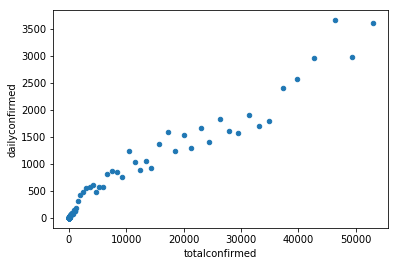

In [15]:
df.plot(x='totalconfirmed',y='dailyconfirmed',kind='scatter')

In [16]:
import numpy as np
import operator
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
X = np.array(df['totalconfirmed'])
y = np.array(df['dailyconfirmed'])

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [19]:
pf = PolynomialFeatures(degree=4)
X_t = pf.fit_transform(X_train.reshape(-1,1))

In [20]:
LR = LinearRegression()
LR.fit(X_t,y_train)

y_pred = LR.predict(pf.transform(X_test.reshape(-1,1)))

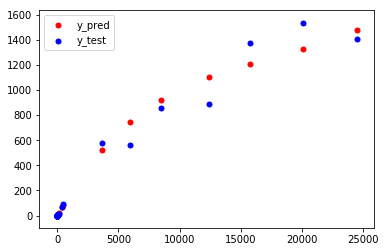

In [21]:
plt.scatter(X_test,y_pred,s=25,c='r')
plt.scatter(X_test,y_test,s=25,c='b')
plt.legend(['y_pred','y_test'])
plt.show()

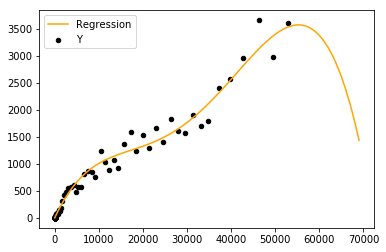

In [22]:
X_plot = np.array([x*1000 for x in range(70)])
y_plot = LR.predict(pf.transform(X_plot.reshape(-1,1)))

plt.scatter(X,y,s=20,c='black')
plt.plot(X_plot,y_plot,color='orange')

plt.legend(['Regression','Y'])
'Confirmed Cases vs Total Cases'
plt.show()